# Advanced Usage Examples

This notebook demonstrates advanced features and practical use cases of the China Stock Data library.

In [1]:
# Advanced imports and setup
from china_stock_data import StockData, StockMarket
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("Advanced analysis environment ready! 🚀")

Advanced analysis environment ready! 🚀


## 1. Portfolio Analysis

In [3]:
# Portfolio analysis with multiple stocks
portfolio_symbols = ['600928', '000002', '600519', '601872', '000858']
portfolio_names = ['西安银行', '万科A', '贵州茅台', '招商轮船', '五粮液']
portfolio_data = {}

print("Building portfolio data...")
for symbol, name in zip(portfolio_symbols, portfolio_names):
    try:
        stock = StockData(symbol, days=252)  # ~1 year of trading days
        data = stock.get_data('kline')
        if not data.empty:
            portfolio_data[name] = data['收盘']
            print(f"✅ {name} ({symbol}): {len(data)} days")
        else:
            print(f"❌ {name} ({symbol}): No data")
    except Exception as e:
        print(f"❌ {name} ({symbol}): Error - {e}")

if portfolio_data:
    portfolio_df = pd.DataFrame(portfolio_data)
    print(f"\nPortfolio DataFrame shape: {portfolio_df.shape}")
    print(f"Date range: {portfolio_df.index.min()} to {portfolio_df.index.max()}")
else:
    print("❌ No portfolio data available")

Building portfolio data...
Fetching stock history data! 600928
✅ 西安银行 (600928): 169 days
✅ 万科A (000002): 169 days
✅ 贵州茅台 (600519): 169 days
Fetching stock history data! 601872
✅ 招商轮船 (601872): 169 days
✅ 五粮液 (000858): 169 days

Portfolio DataFrame shape: (169, 5)
Date range: 0 to 168
✅ 万科A (000002): 169 days
✅ 贵州茅台 (600519): 169 days
Fetching stock history data! 601872
✅ 招商轮船 (601872): 169 days
✅ 五粮液 (000858): 169 days

Portfolio DataFrame shape: (169, 5)
Date range: 0 to 168


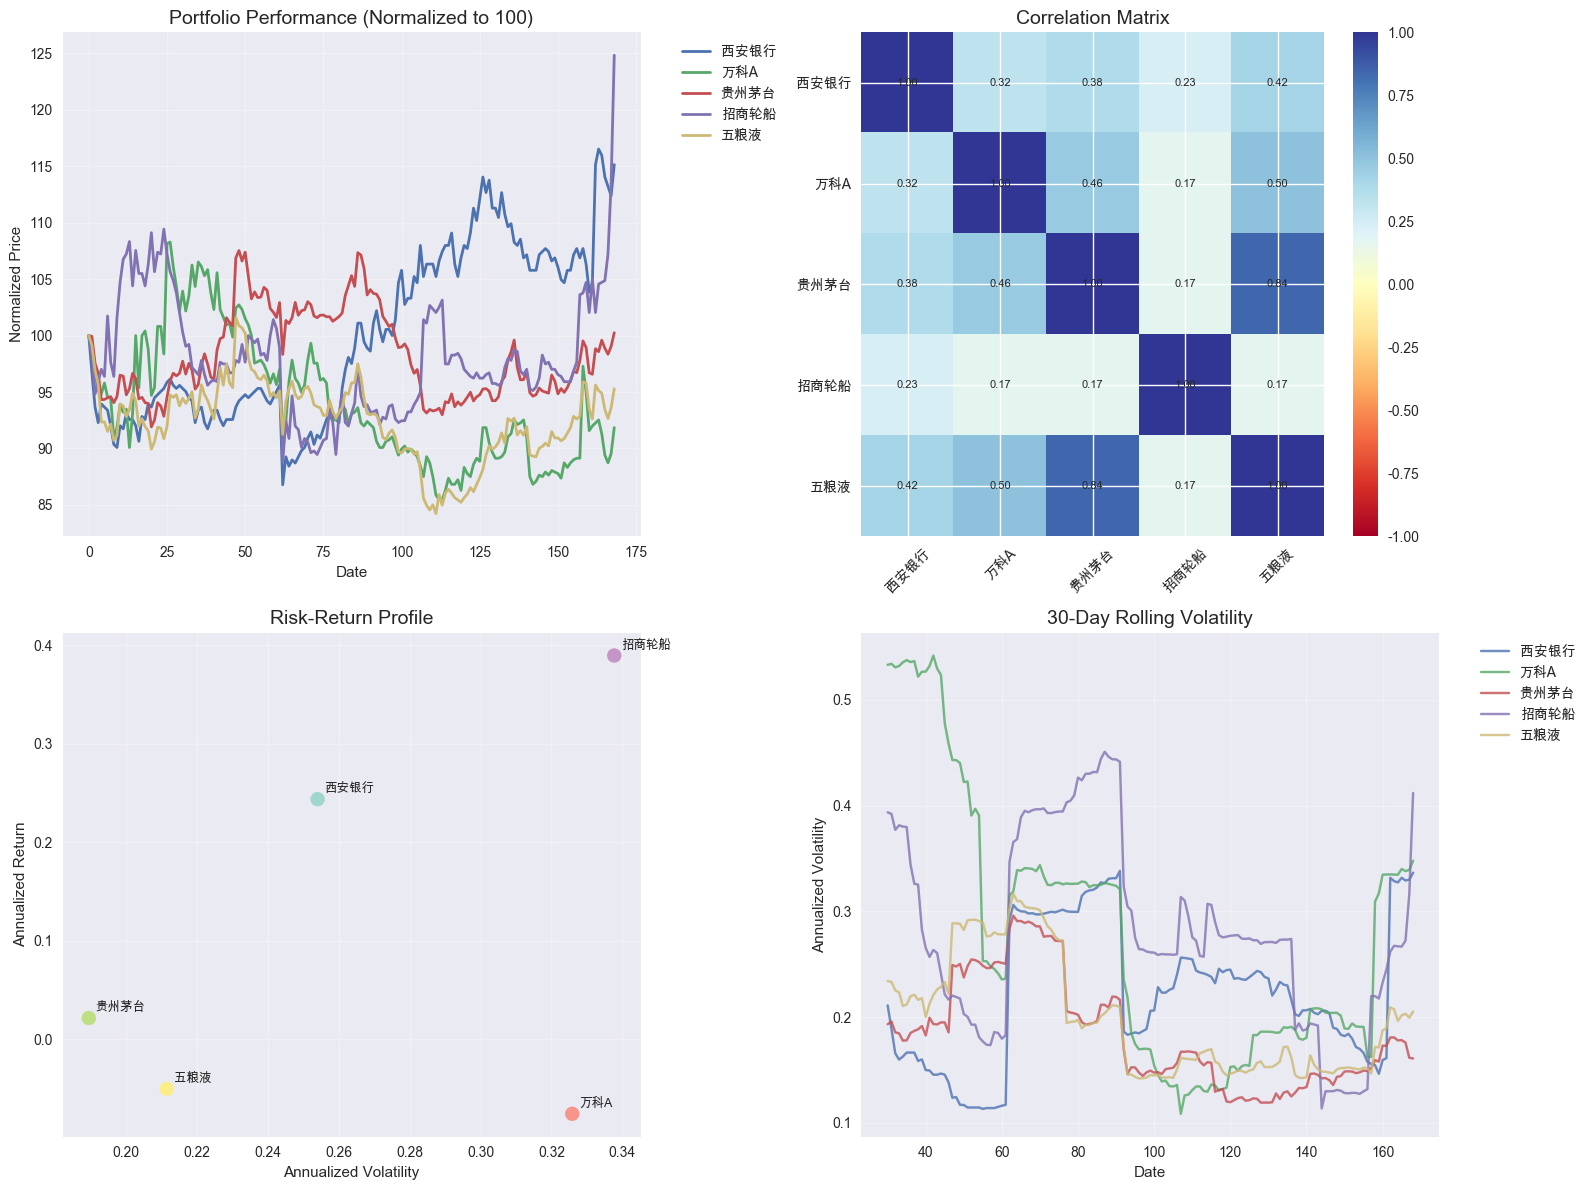


PORTFOLIO SUMMARY STATISTICS
      Annual Return  Annual Volatility  Sharpe Ratio  Max Drawdown
西安银行         0.2437             0.2541        0.9594       -0.1008
万科A         -0.0756             0.3258       -0.2319       -0.2256
贵州茅台         0.0216             0.1896        0.1141       -0.1425
招商轮船         0.3895             0.3377        1.1533       -0.2003
五粮液         -0.0502             0.2115       -0.2375       -0.1834


In [6]:
# Portfolio correlation and risk analysis
if portfolio_data:
    returns = portfolio_df.pct_change().dropna()
    
    # Create comprehensive analysis charts
    plt.figure(figsize=(16, 12))
    
    # Normalize prices to 100 for comparison
    normalized_prices = portfolio_df / portfolio_df.iloc[0] * 100
    
    plt.subplot(2, 2, 1)
    for col in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[col], label=col, linewidth=2)
    plt.title('Portfolio Performance (Normalized to 100)', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Correlation heatmap
    plt.subplot(2, 2, 2)
    correlation_matrix = returns.corr()
    im = plt.imshow(correlation_matrix, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im)
    plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    
    # Add correlation values to heatmap
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=8)
    
    # Risk-Return scatter plot
    plt.subplot(2, 2, 3)
    annual_returns = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(annual_returns)))
    scatter = plt.scatter(annual_volatility, annual_returns, c=colors, s=100, alpha=0.8)
    
    for i, (vol, ret) in enumerate(zip(annual_volatility, annual_returns)):
        plt.annotate(annual_returns.index[i], (vol, ret), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.title('Risk-Return Profile', fontsize=14, fontweight='bold')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Return')
    plt.grid(True, alpha=0.3)
    
    # Rolling volatility
    plt.subplot(2, 2, 4)
    rolling_volatility = returns.rolling(window=30).std() * np.sqrt(252)
    
    for col in rolling_volatility.columns:
        plt.plot(rolling_volatility.index, rolling_volatility[col], label=col, alpha=0.8)
    
    plt.title('30-Day Rolling Volatility', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Annualized Volatility')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n" + "="*60)
    print("PORTFOLIO SUMMARY STATISTICS")
    print("="*60)
    
    # Calculate max drawdown for each stock
    cumulative_returns = returns.cumsum()
    running_max = cumulative_returns.expanding().max()
    drawdown = cumulative_returns - running_max
    max_drawdown = drawdown.min()  # Most negative drawdown for each stock
    
    summary_stats = pd.DataFrame({
        'Annual Return': annual_returns,
        'Annual Volatility': annual_volatility,
        'Sharpe Ratio': annual_returns / annual_volatility,
        'Max Drawdown': max_drawdown
    })
    
    print(summary_stats.round(4))
    
else:
    print("No portfolio data available for analysis")

## 2. Market Sentiment Analysis

In [10]:
# Market analysis using available data
market = StockMarket()

print("Available market data types:")
for fetcher_name in market.fetchers.keys():
    print(f"  • {fetcher_name}")

print("\nFetching market data...")
try:
    # Try index list
    index_list = market.get_data('index_list')
    print(f"Index list data shape: {index_list.shape}")
    if not index_list.empty:
        print("Sample indices:")
        print(index_list.head())
        
    # Try market motion
    market_motion = market.get_data('market_motion')
    print(f"\nMarket motion data shape: {market_motion.shape}")
    if not market_motion.empty:
        print("Market motion data:")
        print(market_motion.head())
        
except Exception as e:
    print(f"Error fetching market data: {e}")

Available market data types:
  • index_components
  • index_list
  • market_motion
  • us_index

Fetching market data...
Index list data shape: (726, 3)
Sample indices:
   index_code display_name publish_date
0           1         上证指数   1991-07-15
1           2         A股指数   1992-02-21
2           3         B股指数   1992-02-21
3           4         工业指数   1993-05-03
4           5         商业指数   1993-05-03
Fetching market motion data!
Error fetching data: Expecting value: line 1 column 1 (char 0)
警告：获取的数据无效，返回空DataFrame。

Market motion data shape: (0, 0)
Error fetching data: Expecting value: line 1 column 1 (char 0)
警告：获取的数据无效，返回空DataFrame。

Market motion data shape: (0, 0)


## 3. Index Analysis and Comparison

Analyzing market indices and components...
Found 726 indices in the system
Top 10 indices:
   index_code display_name publish_date
0           1         上证指数   1991-07-15
1           2         A股指数   1992-02-21
2           3         B股指数   1992-02-21
3           4         工业指数   1993-05-03
4           5         商业指数   1993-05-03
5           6         地产指数   1993-05-03
6           7         公用指数   1993-05-03
7           8         综合指数   1993-05-03
8           9        上证380   2010-11-29
9          10        上证180   2002-07-01


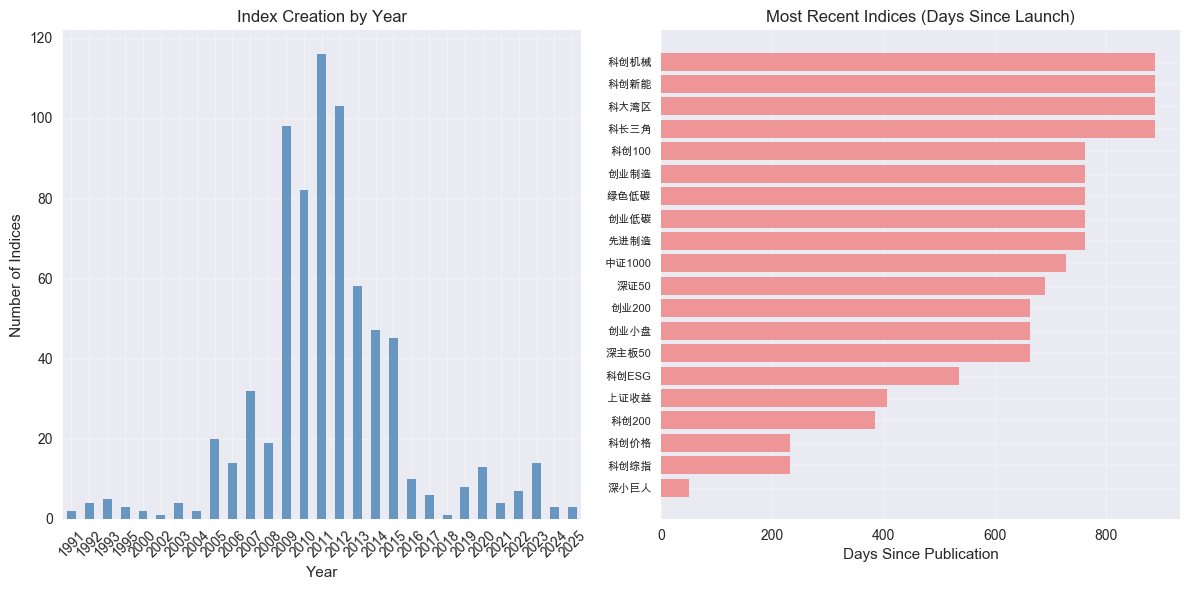

In [11]:
# Simplified comparison using available market data
print("Analyzing market indices and components...")

try:
    market = StockMarket()
    index_list = market.get_data('index_list')
    
    if not index_list.empty:
        print(f"Found {len(index_list)} indices in the system")
        print("Top 10 indices:")
        print(index_list.head(10))
        
        # Show index statistics
        plt.figure(figsize=(12, 6))
        
        # Timeline of index creation
        index_list['publish_date'] = pd.to_datetime(index_list['publish_date'])
        yearly_counts = index_list.groupby(index_list['publish_date'].dt.year).size()
        
        plt.subplot(1, 2, 1)
        yearly_counts.plot(kind='bar', color='steelblue', alpha=0.8)
        plt.title('Index Creation by Year', fontsize=12, fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Number of Indices')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Show recent indices
        plt.subplot(1, 2, 2)
        recent_indices = index_list.sort_values('publish_date', ascending=False).head(20)
        recent_indices['days_since'] = (pd.Timestamp.now() - recent_indices['publish_date']).dt.days
        
        plt.barh(range(len(recent_indices)), recent_indices['days_since'], color='lightcoral', alpha=0.8)
        plt.yticks(range(len(recent_indices)), recent_indices['display_name'], fontsize=8)
        plt.title('Most Recent Indices (Days Since Launch)', fontsize=12, fontweight='bold')
        plt.xlabel('Days Since Publication')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("No index data available")
        
except Exception as e:
    print(f"Error in index analysis: {e}")

## 4. Technical Analysis Dashboard

Fetching stock history data! 600519


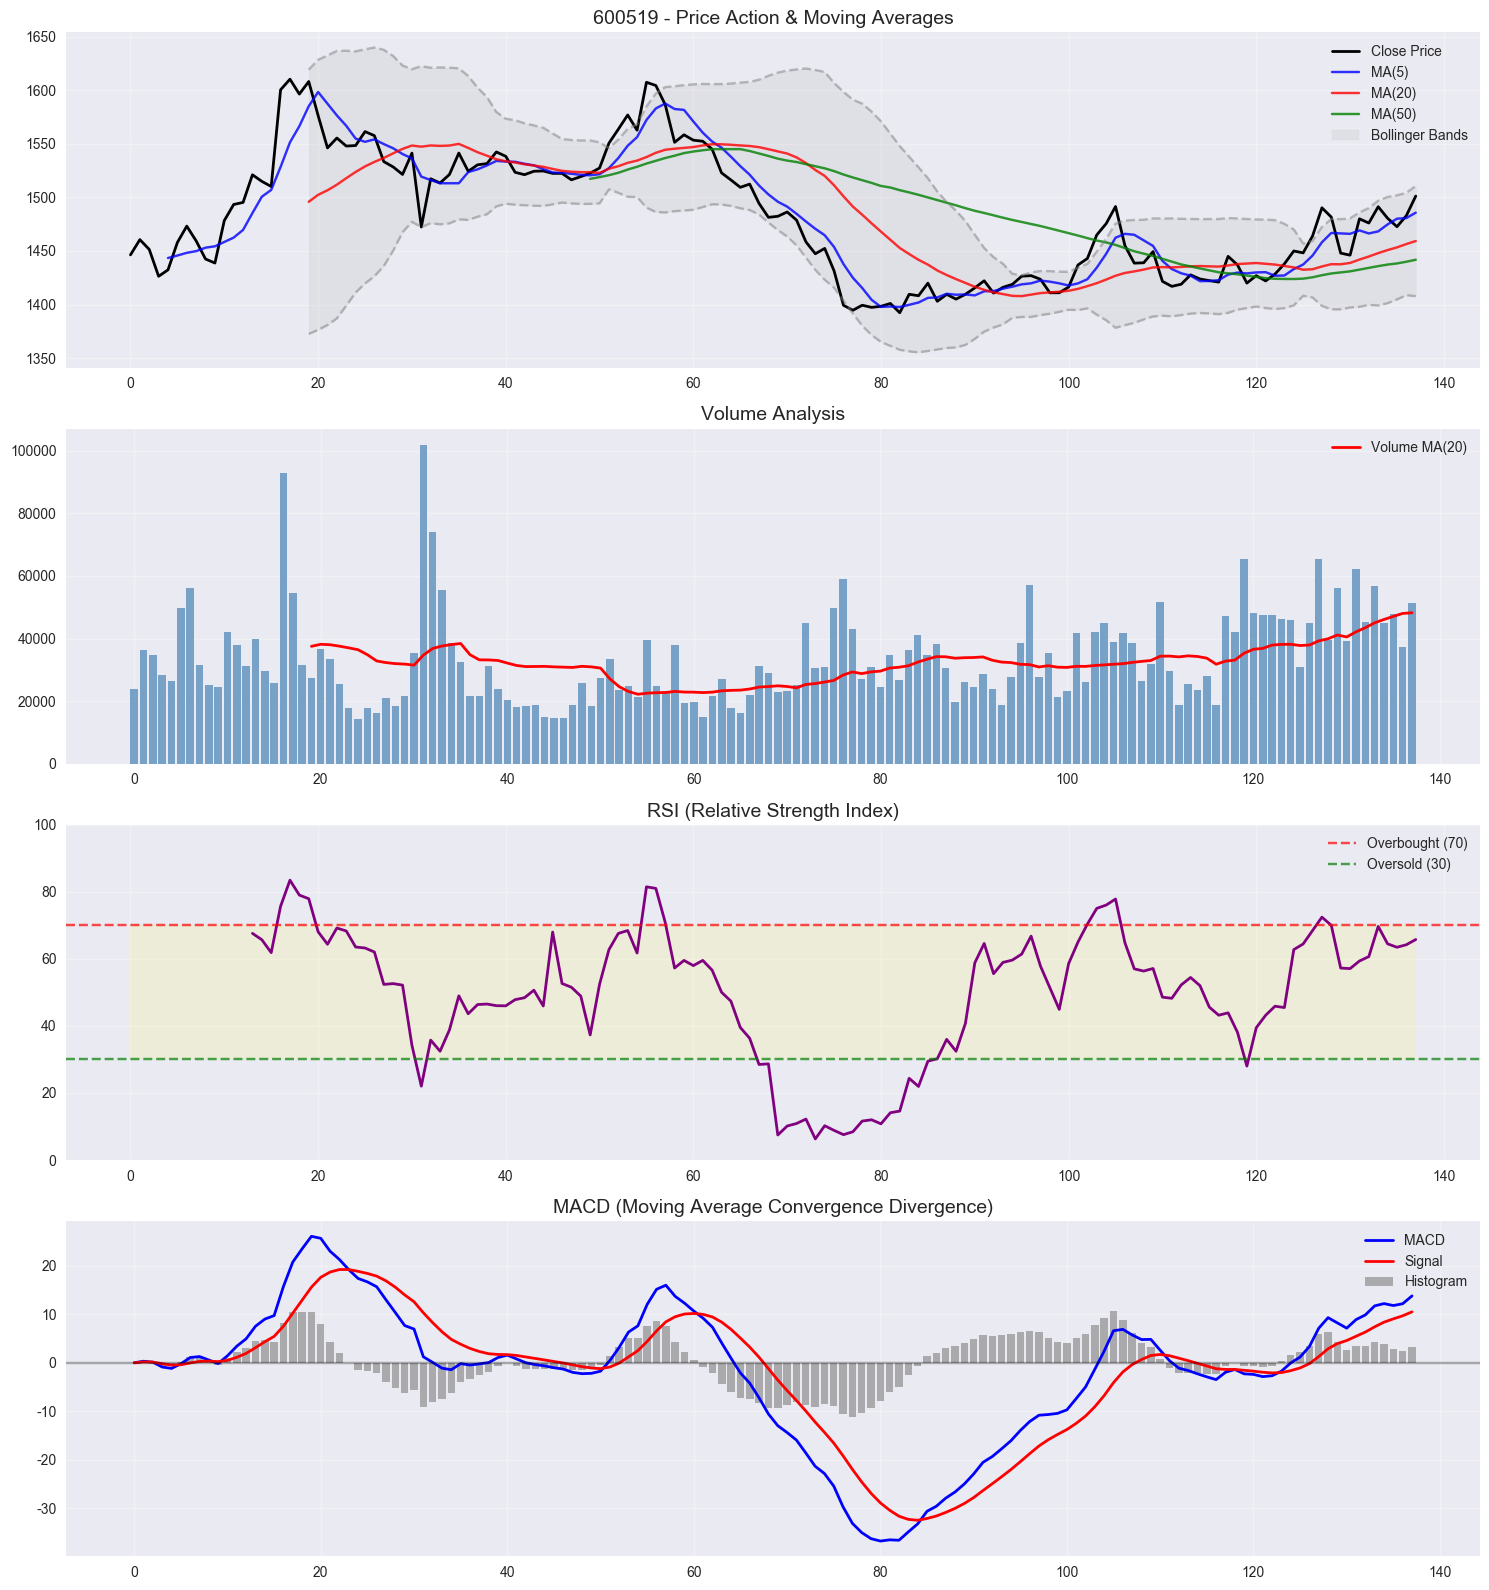


📊 TECHNICAL ANALYSIS SUMMARY for 600519
Current Price: ¥1501.23
RSI: 65.8 (Neutral)
MACD: 13.7873 (Bullish signal)
Bollinger Bands: Within normal range


In [13]:
# Technical Analysis with Multiple Indicators

def calculate_technical_indicators(df):
    """Calculate various technical indicators"""
    # Moving averages
    df['MA_5'] = df['收盘'].rolling(5).mean()
    df['MA_20'] = df['收盘'].rolling(20).mean()
    df['MA_50'] = df['收盘'].rolling(50).mean()
    
    # RSI
    delta = df['收盘'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # MACD
    exp1 = df['收盘'].ewm(span=12).mean()
    exp2 = df['收盘'].ewm(span=26).mean()
    df['MACD'] = exp1 - exp2
    df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()
    df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']
    
    # Bollinger Bands
    df['BB_Middle'] = df['收盘'].rolling(20).mean()
    bb_std = df['收盘'].rolling(20).std()
    df['BB_Upper'] = df['BB_Middle'] + (bb_std * 2)
    df['BB_Lower'] = df['BB_Middle'] - (bb_std * 2)
    
    # Volume indicators
    df['Volume_MA'] = df['成交量'].rolling(20).mean()
    df['Volume_Ratio'] = df['成交量'] / df['Volume_MA']
    
    return df

# Select a stock for technical analysis
analysis_symbol = '600519'  # Kweichow Moutai
stock = StockData(analysis_symbol, days=200)
data = stock.get_data('kline')

if not data.empty:
    # Calculate technical indicators
    tech_data = calculate_technical_indicators(data)
    
    # Create comprehensive technical analysis chart
    fig, axes = plt.subplots(4, 1, figsize=(15, 16))
    
    # Price and Moving Averages
    axes[0].plot(tech_data.index, tech_data['收盘'], label='Close Price', linewidth=2, color='black')
    axes[0].plot(tech_data.index, tech_data['MA_5'], label='MA(5)', alpha=0.8, color='blue')
    axes[0].plot(tech_data.index, tech_data['MA_20'], label='MA(20)', alpha=0.8, color='red')
    axes[0].plot(tech_data.index, tech_data['MA_50'], label='MA(50)', alpha=0.8, color='green')
    
    # Bollinger Bands
    axes[0].fill_between(tech_data.index, tech_data['BB_Upper'], tech_data['BB_Lower'], 
                        alpha=0.1, color='gray', label='Bollinger Bands')
    axes[0].plot(tech_data.index, tech_data['BB_Upper'], '--', alpha=0.5, color='gray')
    axes[0].plot(tech_data.index, tech_data['BB_Lower'], '--', alpha=0.5, color='gray')
    
    axes[0].set_title(f'{analysis_symbol} - Price Action & Moving Averages', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Volume
    axes[1].bar(tech_data.index, tech_data['成交量'], alpha=0.7, color='steelblue')
    axes[1].plot(tech_data.index, tech_data['Volume_MA'], color='red', linewidth=2, label='Volume MA(20)')
    axes[1].set_title('Volume Analysis', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # RSI
    axes[2].plot(tech_data.index, tech_data['RSI'], linewidth=2, color='purple')
    axes[2].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
    axes[2].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
    axes[2].fill_between(tech_data.index, 30, 70, alpha=0.1, color='yellow')
    axes[2].set_title('RSI (Relative Strength Index)', fontsize=14, fontweight='bold')
    axes[2].set_ylim(0, 100)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    # MACD
    axes[3].plot(tech_data.index, tech_data['MACD'], label='MACD', linewidth=2, color='blue')
    axes[3].plot(tech_data.index, tech_data['MACD_Signal'], label='Signal', linewidth=2, color='red')
    axes[3].bar(tech_data.index, tech_data['MACD_Histogram'], label='Histogram', alpha=0.6, color='gray')
    axes[3].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[3].set_title('MACD (Moving Average Convergence Divergence)', fontsize=14, fontweight='bold')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Technical Summary
    latest_price = tech_data['收盘'].iloc[-1]
    latest_rsi = tech_data['RSI'].iloc[-1]
    latest_macd = tech_data['MACD'].iloc[-1]
    latest_signal = tech_data['MACD_Signal'].iloc[-1]
    
    print(f"\n📊 TECHNICAL ANALYSIS SUMMARY for {analysis_symbol}")
    print("="*60)
    print(f"Current Price: ¥{latest_price:.2f}")
    print(f"RSI: {latest_rsi:.1f} ({'Overbought' if latest_rsi > 70 else 'Oversold' if latest_rsi < 30 else 'Neutral'})")
    print(f"MACD: {latest_macd:.4f} ({'Bullish' if latest_macd > latest_signal else 'Bearish'} signal)")
    
    # Price vs Bollinger Bands
    latest_bb_upper = tech_data['BB_Upper'].iloc[-1]
    latest_bb_lower = tech_data['BB_Lower'].iloc[-1]
    if latest_price > latest_bb_upper:
        bb_status = "Above upper band (potentially overbought)"
    elif latest_price < latest_bb_lower:
        bb_status = "Below lower band (potentially oversold)"
    else:
        bb_status = "Within normal range"
    print(f"Bollinger Bands: {bb_status}")
    
else:
    print(f"No data available for {analysis_symbol}")

## 5. Summary and Next Steps

In [14]:
print("🎉 Advanced Usage Examples Completed!")
print("\n" + "="*60)
print("WHAT YOU'VE LEARNED:")
print("="*60)
print("1. ✅ Portfolio Analysis & Risk Management")
print("   - Multi-stock comparison")
print("   - Correlation analysis")
print("   - Risk-return profiling")
print("\n2. ✅ Market Sentiment Analysis")
print("   - Market indicators visualization")
print("   - Sentiment data interpretation")
print("\n3. ✅ Index Analysis")
print("   - Index composition analysis")
print("   - Cross-index comparison")
print("   - Component stock analysis")
print("\n4. ✅ Technical Analysis Dashboard")
print("   - Multiple technical indicators")
print("   - Signal interpretation")
print("   - Comprehensive charting")

print("\n" + "="*60)
print("NEXT STEPS:")
print("="*60)
print("1. 🔍 Explore more stocks and time periods")
print("2. 📈 Build custom trading strategies")
print("3. 🤖 Implement automated analysis workflows")
print("4. 📊 Create custom visualization dashboards")
print("5. 📝 Export analysis results for reporting")

print("\n💡 Happy analyzing! The china_stock_data library provides")
print("   powerful tools for Chinese stock market analysis.")
print("\n📚 Check out other example notebooks for more use cases!")

🎉 Advanced Usage Examples Completed!

WHAT YOU'VE LEARNED:
1. ✅ Portfolio Analysis & Risk Management
   - Multi-stock comparison
   - Correlation analysis
   - Risk-return profiling

2. ✅ Market Sentiment Analysis
   - Market indicators visualization
   - Sentiment data interpretation

3. ✅ Index Analysis
   - Index composition analysis
   - Cross-index comparison
   - Component stock analysis

4. ✅ Technical Analysis Dashboard
   - Multiple technical indicators
   - Signal interpretation
   - Comprehensive charting

NEXT STEPS:
1. 🔍 Explore more stocks and time periods
2. 📈 Build custom trading strategies
3. 🤖 Implement automated analysis workflows
4. 📊 Create custom visualization dashboards
5. 📝 Export analysis results for reporting

💡 Happy analyzing! The china_stock_data library provides
   powerful tools for Chinese stock market analysis.

📚 Check out other example notebooks for more use cases!
